# Bangalore house price prediction system:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset and alnaysing:

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# finding all the unique values:

for i in df.columns:
    arr1=df[i].unique()
    print(arr1,"\n\n")

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 


['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 


['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout'] 


['2 B

In [5]:
# checking for null values:

df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Dealing with missing values:

### Droping columns that have null values and or are not valuable for our analysis:

In [6]:
df.drop(columns=['area_type','balcony','availability','society'], inplace=True)

### Finding appropriate values for the missing values:

In [7]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

here we can see that "Whitefield" and "Sarjapur  Road" have the highest count and since there is only one missing vlaue in this column, Therefore we can replace it with ethier of these values. 

In [8]:
# Filling out the missing valeus in "location" column:

df['location'].fillna('Whitefield',inplace=True)
df.isna().sum()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_25536\2670409366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Whitefield',inplace=True)


location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

#### here we have also seen that there are way too many locations that have less value counts and are not helping us optimise the result hence we can cassify them as others:

In [9]:
temp=df['location'].value_counts()
df['location']=df['location'].apply(lambda x: 'others' if temp[x]<=10  else x)
           

What this function does is that it iterates in the series "Temp" which contains all the value count of unique elements in the location column. the "x" takes all thoes values and then checks that weather that value is smaller than 10 or not. if true then the lambda function will automatically replace that value with "others" hence resolving our issue. 

In [10]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

Since there are 16 null values in this column and "2 BHK" has the highest value count therfore we replace the null values with this value. 

In [11]:
# Filling out the missing valeus in "size" column:

df['size'].fillna('2 BHK',inplace=True)
df.isna().sum()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_25536\3532268809.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna('2 BHK',inplace=True)


location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: count, dtype: int64

there are 73 null values in this column and "2.0" has the highest value count therfore we replace the null values with this value. 

In [13]:
# Filling out the missing valeus in "bath" column:

df['bath'].fillna(df['bath'].median(),inplace=True)
df.isna().sum()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_25536\2671080598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


### seprating numeric values from the size column:

In [15]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)

### correcting the values in 'total_sqft':

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

as we can see there are some values that are in the form of range and hence are needed to be modified

In [17]:
def convertRange(x): 
    temp=x.split('-')          # spliting the numeric string from the range and storing them in a list.
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2    # returning the avg values.
    try:
        return float(x)
    except:
        return None
    
df['total_sqft']=df['total_sqft'].apply(convertRange)    


### creating a new column for Price per sqft:

In [18]:
df['Price_Per_sqft']=df['price']*100000/df['total_sqft']


In [19]:
df.describe()

,total_sqft,bath,price,BHK,Price_Per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Removing outliers:

In [20]:
df.describe()


,total_sqft,bath,price,BHK,Price_Per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


here we can see that in these columns there are some absurd values that needs to be removed:

here in the total_sqft column we can see that the min value is 1 which is obvisouly an outlier, we can also see this by finding out the sqft per bhk:

In [21]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

the min value is 0.250000 which is not possible, on an avg the ratio for Total_sqft/bhk is in between 300-600 sqft therefore we will only consider the values that have this ratio above 300:

In [22]:
df=df[((df['total_sqft']/df['BHK'])>=300)]
df.describe()

,total_sqft,bath,price,BHK,Price_Per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


now we can see that the min value is starting from 300 which is reasonable


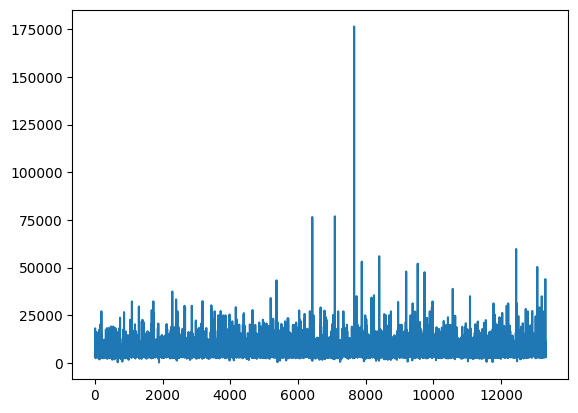

In [23]:
df['Price_Per_sqft'].describe()
plt.plot(df['Price_Per_sqft'])
plt.show()


here we can see that the max value is not making any sense and so it is considered as an outlier, so 

In [26]:
# removing outliers from sqft:
def removeOutliersSqft(df):
    df_out=pd.DataFrame()
    for keys, subDf in df.groupby('location'):
        mean = np.mean(subDf.Price_Per_sqft)
        StandardDeaviation = np.std(subDf.Price_Per_sqft)

        newDf = subDf[(subDf.Price_Per_sqft>(mean-StandardDeaviation))&(subDf.Price_Per_sqft<=(mean+StandardDeaviation))]
        df_out=pd.concat([df_out,newDf],ignore_index=True)
    return df_out
df=removeOutliersSqft(df)
df.describe()


,total_sqft,bath,price,BHK,Price_Per_sqft
count,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,1508.225612,2.471370,91.272217,2.574534,5659.161459
std,880.672852,0.979532,86.334381,0.897804,2265.572879
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.864208
50%,1285.500000,2.000000,67.000000,2.000000,5175.792088
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [28]:
# removing outliers from the bhk column:
def BHK_outlier_removal(df):
    excluding_indices = np.array([])
    for location,location_df in df.groupby('location'):
        BHK_info = {}
        for bhk,BHK_df in location_df.groupby('BHK'):
            BHK_info[bhk]={
                'mean':np.mean(BHK_df.Price_Per_sqft),
                'std':np.std(BHK_df.Price_Per_sqft),
                'count':BHK_df.shape[0]
            }
        for bhk, BHK_df in location_df.groupby('BHK'):
            info=BHK_info.get(bhk-1)
            if info and info['count']>5:
                excluding_indices=np.append(excluding_indices,BHK_df[BHK_df.Price_Per_sqft<(info['mean'])].index.values)
    return df.drop(excluding_indices,axis='index')

df=BHK_outlier_removal(df)

### final dataset:

In [30]:
df.drop(columns=['size','Price_Per_sqft'],inplace=True)

## Cleaned Dataset:

In [32]:
df.head()

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


### Exporting the dataset to CSV :

In [33]:
df.to_csv("cleanedDataset.csv")

## Traning model:

In [35]:
x=df.drop(columns=['price'])
y=df['price']

In [64]:
# importing necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [40]:
#spliting data:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(5898, 4)
(1475, 4)


## Applying linear Regression :

In [53]:
column_trans = make_column_transformer((OneHotEncoder(), ['location']),remainder='passthrough')
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, Y_train)

# Prediction:
y_prediction_lr = pipe.predict(X_test)
r2_score(Y_test, y_prediction_lr)

0.8642268231827686

## Applying lasso:

In [67]:
lasso = Lasso(alpha=0.1) 
pipe = make_pipeline(column_trans, lasso)
pipe.fit(X_train, Y_train)

# Prediction:
Y_prediction_lasso = pipe.predict(X_test)
r2_score(Y_test, Y_prediction_lasso)


0.8372464015131222


## Applying Ridge:

In [83]:

ridge = Ridge(alpha=0.1) 
pipe = make_pipeline(column_trans, ridge)
pipe.fit(X_train, Y_train)

# Prediction:
Y_prediction_ridge = pipe.predict(X_test)
r2_score(Y_test, Y_prediction_ridge)


0.8625423923326462

In [85]:
print(r2_score(Y_test, y_prediction_lr))
print(r2_score(Y_test, Y_prediction_lasso))
print(r2_score(Y_test, Y_prediction_ridge))

0.8642268231827686
0.8372464015131222
0.8625423923326462


### Dumping model:

In [87]:
import pickle
pickle.dump(pipe,open('ridgeModel.pkl','wb'))
